# Study Question 3.2.1

a) We have the causal graph below and we know the following probabilities

$$P(Z = z_{1}) = r$$
$$P(Y = y_{1} \mid Z = z_{0}, X = x_{0}) = p_{1}$$
$$P(Y = y_{1} \mid Z = z_{0}, X = x_{1}) = p_{2}$$
$$P(Y = y_{1} \mid Z = z_{1}, X = x_{0}) = p_{3}$$
$$P(Y = y_{1} \mid Z = z_{1}, X = x_{1}) = p_{4}$$
$$P(X = x_{1} \mid Z = z_{0}) = q_{1}$$
$$P(X = x_{1} \mid Z = z_{1}) = q_{2}$$

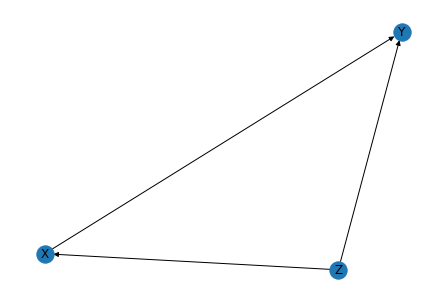

In [2]:
import networkx as nx

G = nx.DiGraph()
G.add_nodes_from(['Z', 'X', 'Y'])
G.add_edges_from([['Z', 'X'], ['Z', 'Y'], ['X', 'Y']])
nx.draw(G, with_labels=True)

To simulate the intervention we remove all arrows entering X, which means we can ignore these:

$$P(X = x_{1} \mid Z = z_{0}) = q_{1}$$
$$P(X = x_{1} \mid Z = z_{1}) = q_{2}$$

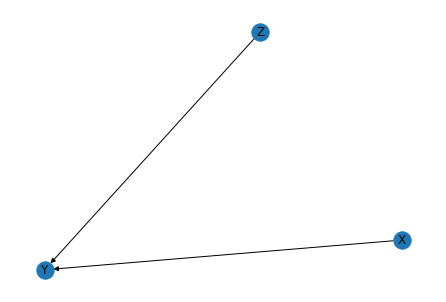

In [3]:
G.remove_edges_from(list(G.in_edges('X')))
nx.draw(G, with_labels=True)

In [4]:
import numpy as np

n = 1000000

# Pick some random values for our parameters
r = 0.23
p1 = 0.54
p2 = 0.76
p3 = 0.12
p4 = 0.49
q1 = 0.19
q2 = 0.48

def simulate(X = None):
    Z = (np.random.uniform(size = n) < r) * 1
    
    if X is None:
        X = np.zeros_like(Z)
        X[Z == 1] = (np.random.uniform(size = np.sum(Z == 1)) < q2) * 1
        X[Z == 0] = (np.random.uniform(size = np.sum(Z == 0)) < q1) * 1
    
    Y = np.zeros_like(X)

    #P(Y = y1 | Z = z0, X = x0) = p1
    mask = np.logical_and(Z == 0, X == 0)
    Y[mask] = (np.random.uniform(size = np.sum(mask)) < p1) * 1

    #P(Y = y1 | Z = z0, X = x1) = p2
    mask = np.logical_and(Z == 0, X == 1)
    Y[mask] = (np.random.uniform(size = np.sum(mask)) < p2) * 1

    #P(Y = y1 | Z = z1, X = x0) = p2
    mask = np.logical_and(Z == 1, X == 0)
    Y[mask] = (np.random.uniform(size = np.sum(mask)) < p3) * 1

    #P(Y = y1 | Z = z1, X = x1) = p2
    mask = np.logical_and(Z == 1, X == 1)
    Y[mask] = (np.random.uniform(size = np.sum(mask)) < p4) * 1
    
    return (X,Y,Z)

# P(Y|do(X = 1))
(X,Y,Z) = simulate(X = np.ones(n))

print(f'P(Y = 1|do(X = 1)) = {np.mean(Y)}')
print(f'P(Y = 0|do(X = 1)) = {1 - np.mean(Y)}')

# P(Y|do(X = 0))
(X,Y,Z) = simulate(X = np.zeros(n))

print(f'P(Y = 1|do(X = 0)) = {np.mean(Y)}')
print(f'P(Y = 0|do(X = 0)) = {1 - np.mean(Y)}')

P(Y = 1|do(X = 1)) = 0.698302
P(Y = 0|do(X = 1)) = 0.301698
P(Y = 1|do(X = 0)) = 0.443423
P(Y = 0|do(X = 0)) = 0.556577


b) Calculating using the adjustment formula

$$P(Y = y \mid \textit{do}(X = x)) = \sum_{z}P(Y = y\mid X = x,Z = z)P(Z = z)$$

In [5]:
# P(Y = 1|do(X = 1))
# = P(Y = 1| X = 1, Z = 0)P(Z = 0) + P(Y = 1| X = 1, Z = 1)P(Z = 1)
print(f'P(Y = 1|do(X = 1)) = {p2*(1-r) + p4*r}')

# P(Y = 0|do(X = 1))
# = P(Y = 0| X = 1, Z = 0)P(Z = 0) + P(Y = 0| X = 1, Z = 1)P(Z = 1)
print(f'P(Y = 0|do(X = 1)) = {(1-p2)*(1-r) + (1-p4)*r}')

# P(Y = 1|do(X = 0))
# = P(Y = 1| X = 0, Z = 0)P(Z = 0) + P(Y = 1| X = 0, Z = 1)P(Z = 1)
print(f'P(Y = 1|do(X = 0)) = {p1*(1-r) + p3*r}')

# P(Y = 0|do(X = 0))
# = P(Y = 0| X = 0, Z = 0)P(Z = 0) + P(Y = 0| X = 0, Z = 1)P(Z = 1)
print(f'P(Y = 0|do(X = 0)) = {(1-p1)*(1-r) + (1-p3)*r}')

P(Y = 1|do(X = 1)) = 0.6979000000000001
P(Y = 0|do(X = 1)) = 0.3021
P(Y = 1|do(X = 0)) = 0.44340000000000007
P(Y = 0|do(X = 0)) = 0.5566


c) From above we know that

$$ACE = p_{2}(1-r) + p_{4}r - p_{1}(1-r) -p_{3}r$$

Now we need to calculate Risk Difference (RD)

$$RD = P(Y = 1\mid X = 1) - P(Y = 1\mid X=0)$$

Let's calculate $P(Y = 1\mid X = 1)$ first.

$$\begin{align}
P(Y = 1\mid X = 1) &= P(Y=1\mid X=1,Z=1)P(Z=1|X=1)\\
&+ P(Y=1\mid X=1,Z=0)P(Z=0|X=1)
\end{align}$$

We know that:

$$\begin{align}
&P(Z = 1) = r\\
&P(Y = 1 \mid Z = 0, X = 1) = p_{2}\\
&P(Y = 1 \mid Z = 1, X = 1) = p_{4}\\
&P(X = 1 \mid Z = 1) = q_{2}\\
&P(X = 1 \mid Z = 0) = q_{1}
\end{align}$$

And

$$\begin{align}
P(X=1) &= P(X=1\mid Z=1)P(Z=1) + P(X=1\mid Z=0)P(Z=0)\\
&= q_{2}r + q_{1}(1-r)
\end{align}$$

Using Bayes' theorem:
$$\begin{align}
P(Z=1\mid X=1) &= \frac{P(X=1\mid Z=1)P(Z=1)}{P(X=1)}\\
&= \frac{q_{2}r}{q_{2}r + q_{1}(1-r)}\\
&= \alpha
\end{align}$$

Putting it all together

$$P(Y = 1\mid X = 1) = p_{4}\alpha + p_{2}(1 - \alpha)$$


Similarly, for $P(Y = 1\mid X = 0)$

$$\begin{align}
P(Y = 1\mid X = 0) &= P(Y=1\mid X=0,Z=1)P(Z=1|X=0)\\
&+ P(Y=1\mid X=0,Z=0)P(Z=0|X=0)
\end{align}$$

We know that

$$\begin{align}
&P(Z = 0) = (1-r)\\
&P(Y = 1 \mid Z = 1, X = 0) = p_{3}\\
&P(Y = 1 \mid Z = 0, X = 0) = p_{1}\\
&P(X = 0 \mid Z = 1) = 1-q_{2}\\
&P(X = 0 \mid Z = 0) = 1-q_{1}
\end{align}$$

Using Bayes' theorem:
$$\begin{align}
P(Z=1\mid X=0) &= \frac{P(X=0\mid Z=1)P(Z=1)}{P(X=0)}\\
&= \frac{(1-q_{2})r}{1 - q_{2}r - q_{1}(1-r)}\\
&= \beta
\end{align}$$

Putting it all together

$$P(Y = 1\mid X = 0) = p_{3}\beta + p_{1}(1 - \beta)$$

Therefore...

$$RD = p_{4}\alpha + p_{2}(1 - \alpha) - p_{3}(\beta) - p_{1}(1 - \beta)$$

In [59]:
# simulate to check answers
X,Y,Z = simulate()

print(f'Simulated: P(X = 1) = {np.mean(X)}')
p_x_1 = q2*r + q1*(1-r)
print(f'Calculated: P(X = 1) = {p_x_1}')

print(f'\nSimulated: P(Z = 1|X = 1) = {np.mean(Z[X == 1])}')
p_z_1_x_1 = q2*r / p_x_1
print(f'Calculated: P(Z = 1|X = 1) = {p_z_1_x_1}')

print(f'\nSimulated: P(Y = 1|X = 1) = {np.mean(Y[X == 1])}')
p_y_1_x_1 = p4*p_z_1_x_1 + p2*(1-p_z_1_x_1)
print(f'Calculated: P(Z = 1|X = 1) = {p_y_1_x_1}')

print(f'\nSimulated: P(Z = 1|X = 0) = {np.mean(Z[X == 0])}')
p_z_1_x_0 = (1-q2)*r / (1-p_x_1)
print(f'Calculated: P(Z = 1|X = 1) = {p_z_1_x_0}')

print(f'\nSimulated: P(Y = 1|X = 0) = {np.mean(Y[X == 0])}')
p_y_1_x_0 = p3*p_z_1_x_0 + p1*(1-p_z_1_x_0)
print(f'Calculated: P(Y = 1|X = 0) = {p_y_1_x_0}')

print(f'\nSimulated: RD = {np.mean(Y[X == 1]) - np.mean(Y[X == 0])}')
print(f'Calculated: RD = {p_y_1_x_1 - p_y_1_x_0}')

(_,Y_do_x_1,_) = simulate(X = np.ones(n))
(_,Y_do_x_0,_) = simulate(X = np.zeros(n))
print(f'\nSimulated: ACE = {np.mean(Y_do_x_1) - np.mean(Y_do_x_0)}')
print(f'Calculated: ACE = {p2*(1-r) + p4*r - p1*(1-r) - p3*r}')

Simulated: P(X = 1) = 0.257277
Calculated: P(X = 1) = 0.25670000000000004

Simulated: P(Z = 1|X = 1) = 0.42891513815848287
Calculated: P(Z = 1|X = 1) = 0.43007401636151144

Simulated: P(Y = 1|X = 1) = 0.6424087656494751
Calculated: P(Z = 1|X = 1) = 0.6438800155823919

Simulated: P(Z = 1|X = 0) = 0.16139260531853733
Calculated: P(Z = 1|X = 1) = 0.1609040764159828

Simulated: P(Y = 1|X = 0) = 0.47223662118986487
Calculated: P(Y = 1|X = 0) = 0.4724202879052873

Simulated: RD = 0.17017214445961026
Calculated: RD = 0.17145972767710466

Simulated: ACE = 0.25572900000000004
Calculated: ACE = 0.2545


What parameters would minimise the difference between ACE and RD?

$$\begin{align}
ACE - RD &= p_{4}r + p_{2}(1-r) - p_{3}r - p_{1}(1-r) - p_{4}\alpha - p_{2}(1-\alpha) + p_{3}\beta + p_{1}(1-\beta)\\
&= p_{4}(r - \alpha) + p_{2}(\alpha - r) + p_{1}(r - \beta) - p_{3}(r - \beta)
\end{align}$$

This is minimised when $\alpha = \beta = r$. Solving for $\alpha = r$ and $\beta = r$ gives us $q_{1} = q_{2}$

d) The $ACE$ is positive, so we can search for values of $q_{1}$ and $q_{2}$ that will give us a negative $RD$ given our values for $p_{1}, p_{2}, p_{3}, p_{4}, r$. A simple grid search should do the trick.

Text(0, 0.5, 'q2')

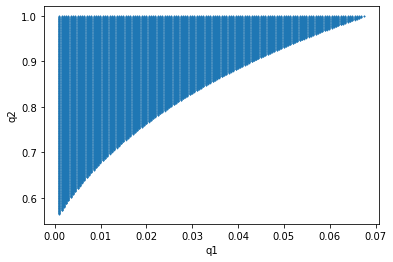

In [58]:
import matplotlib.pyplot as plt

granularity = 2000

# create a grid of candidate q values
q = np.column_stack(
    (np.tile(np.linspace(0.001,0.999,granularity), granularity),
    np.repeat(np.linspace(0.001,0.999,granularity), granularity))
)

alpha = q[:,1]*r / (q[:,1]*r + q[:,0]*(1-r))
beta = (1 - q[:,1])*r / (1 - q[:,1]*r - q[:,0]*(1-r))

rd = p4*alpha + p2*(1-alpha) - p3*beta - p1*(1-beta)

reversal_qs = q[rd < 0, :]

# plot the q1, q2 values that generate a negative RD
plt.scatter(reversal_qs[:,0], reversal_qs[:,1], s = 0.5)
plt.xlabel('q1')
plt.ylabel('q2')